In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
movies=pd.read_csv("movies.csv")
ratings=pd.read_csv("ratings.csv")
tags=pd.read_csv("tags.csv")
links=pd.read_csv("links.csv")


In [3]:
print("movies")
display(movies.head())
print("ratings")
display(ratings.head())
print("tags")
display(tags.head())
print("links")
display(links.head())


movies


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


ratings


,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


tags


,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102


links


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
print("info about them")
print("\nmovies")
display(movies.info())
print("\nratings")
display(ratings.info())
print("\ntags")
display(tags.info())
print("\nlinks")
display(links.info())


info about them

movies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


None


ratings
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


None


tags
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000072 entries, 0 to 2000071
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 61.0+ MB


None


links
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  87585 non-null  int64  
 1   imdbId   87585 non-null  int64  
 2   tmdbId   87461 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.0 MB


None

In [5]:
print("null info")
print("\nmovies")
display(movies.isnull().sum())
print("\nratings")
display(ratings.isnull().sum())
print("\ntags")
display(tags.isnull().sum())
print("\nlinks")
display(links.isnull().sum())

null info

movies


movieId    0
title      0
genres     0
dtype: int64


ratings


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


tags


userId        0
movieId       0
tag          17
timestamp     0
dtype: int64


links


movieId      0
imdbId       0
tmdbId     124
dtype: int64

In [6]:
tags["tag"]=tags["tag"].fillna("no tags")


In [7]:
links.dropna(subset=['tmdbId'])

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
87580,292731,26812510,1032473.0
87581,292737,14907358,986674.0
87582,292753,12388280,948139.0
87583,292755,64027,182776.0


In [8]:
ratings['userId'].nunique()

200948

In [9]:
ratings["movieId"].nunique()

84432

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [12]:
rating_per_user=ratings['userId'].value_counts()

In [13]:
print(rating_per_user)

userId
175325    33332
17035      9577
55653      9178
123465     9044
171795     9016
          ...  
161168       20
87952        20
187372       20
5564         20
129987       20
Name: count, Length: 200948, dtype: int64


In [14]:
rating_per_user.describe()

count    200948.000000
mean        159.246193
std         282.025462
min          20.000000
25%          36.000000
50%          73.000000
75%         167.000000
max       33332.000000
Name: count, dtype: float64

In [15]:
rating_per_user.info()

<class 'pandas.core.series.Series'>
Index: 200948 entries, 175325 to 129987
Series name: count
Non-Null Count   Dtype
--------------   -----
200948 non-null  int64
dtypes: int64(1)
memory usage: 3.1 MB


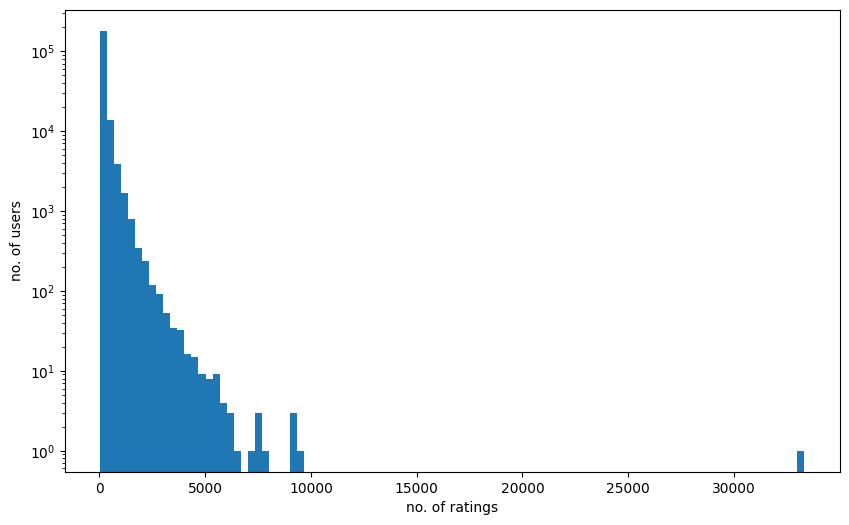

In [16]:
#histogram
plt.figure(figsize=(10,6))
plt.hist(rating_per_user,bins=100)
plt.title=("distribution of ratings per user")
plt.xlabel("no. of ratings")
plt.ylabel("no. of users")

plt.yscale('log')

In [17]:
rating_per_movie=ratings['movieId'].value_counts()

In [18]:
rating_per_movie.describe()

count     84432.000000
mean        379.005638
std        2592.439791
min           1.000000
25%           2.000000
50%           5.000000
75%          25.000000
max      102929.000000
Name: count, dtype: float64

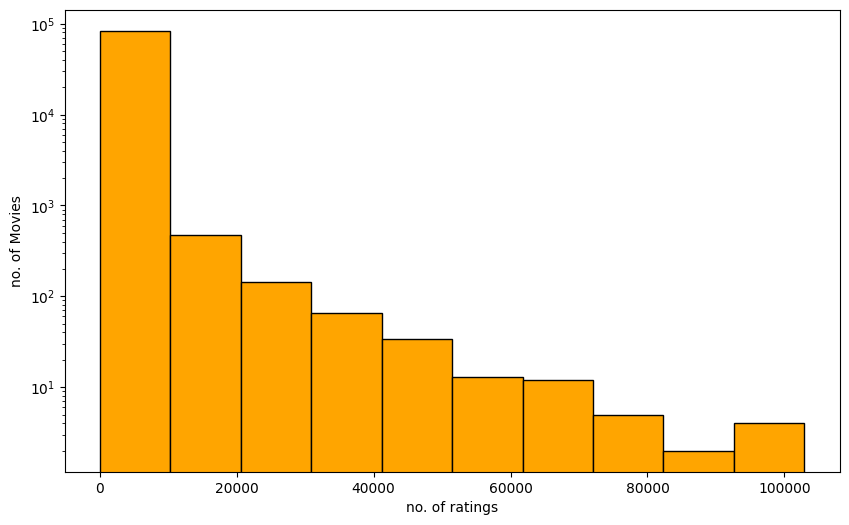

In [19]:
#histogram
plt.figure(figsize=(10,6))
plt.hist(rating_per_movie, bins=10, color='orange', edgecolor='black')
plt.title=("distribution of ratings per movie")
plt.xlabel("no. of ratings")
plt.ylabel("no. of Movies")
plt.yscale('log')  # Log scale for better visualization
plt.show()

In [20]:
# Since most users interact with only a few movies, and most movies receive only a few ratings, the dataset is sparse. To focus on meaningful data:

# Filter out movies with very few ratings.
# A common threshold is at least 20 ratings per movie, but this can vary based on your dataset size and goals.
# Filter out users who have rated very few movies.
# A common threshold is at least 10 ratings per user.
# This filtering step helps reduce noise and sparsity, making the model more effective.

In [21]:
#1
popular_movies=ratings["movieId"].value_counts()
popular_movies=popular_movies[popular_movies>=20].index
ratings=ratings[ratings["movieId"].isin(popular_movies)]

In [22]:
active_users=ratings["userId"].value_counts()
active_users=active_users[active_users>=10].index
ratings=ratings[ratings["userId"].isin(active_users)]

In [23]:
print(f"Filtered dataset has {ratings.shape[0]} ratings from {ratings['userId'].nunique()} users on {ratings['movieId'].nunique()} movies.")


Filtered dataset has 31725896 ratings from 200945 users on 23350 movies.


In [24]:
ratings.tail()

,userId,movieId,rating,timestamp
32000199,200948,79702,4.5,1294412589
32000200,200948,79796,1.0,1287216292
32000201,200948,80350,0.5,1294412671
32000202,200948,80463,3.5,1350423800
32000203,200948,87304,4.5,1350423523


In [25]:
#mapping for userId
user_mapping={user:idx for idx,user in enumerate(ratings["userId"].unique())}
ratings["userId"]=ratings["userId"].map(user_mapping)

#mapping for movieId
movie_mapping={movie:idx for idx,movie in enumerate(ratings["movieId"].unique())}
ratings["movieId"]=ratings["movieId"].map(movie_mapping)

# Save the reverse mappings for interpretation later
reverse_user_mapping={idx:user for user,idx in user_mapping.items()}
reverse_movie_mapping = {idx: movie for movie, idx in movie_mapping.items()}


In [26]:
ratings.head()

,userId,movieId,rating,timestamp
0,0,0,4.0,944249077
1,0,1,1.0,944250228
2,0,2,2.0,943230976
3,0,3,5.0,944249077
4,0,4,5.0,943228858


In [27]:
#creating test set
temp_data,test_data=train_test_split(ratings,test_size=0.2,random_state=42)

In [28]:
# cross_valiidation set
train_data,cv_data=train_test_split(temp_data,test_size=0.3,random_state=42)

In [ ]:
# cross_valiidation set
train_data,cv_data=train_test_split(temp_data,test_size=0.3,random_state=42)

In [30]:
# Compute the average rating for each movie in the training set
movie_avg_rating=train_data.groupby("movieId")["rating"].mean().to_dict()

In [39]:
#1
#predict ratings using global avg rating
test_copy2=test_data
global_avg=train_data['rating'].mean()
test_copy2['predicted_rating'] = global_avg

# Evaluate performance (Mean Absolute Error - MAE)
from sklearn.metrics import mean_absolute_error

mae_global = mean_absolute_error(test_copy2['rating'], test_copy2['predicted_rating'])
print(f"Global Average Rating MAE: {mae_global:.2f}")


Global Average Rating MAE: 0.84


In [34]:
#2
#predict ratings in test set using movie avgs
test_copy1=test_data

test_copy1["predicted_rating"]=test_copy1["movieId"].map(movie_avg_rating)

In [36]:
test_copy1.head()

,userId,movieId,rating,timestamp,predicted_rating
523996,3399,57,4.0,1689657167,4.263570
4719118,29505,735,1.5,1556394382,3.291755
10598074,66355,4680,3.5,1059332695,3.077642
13553,85,122,5.0,942401795,3.036374
31627473,198647,296,4.0,1445921998,3.675195


In [41]:
# Fill missing predictions (if any movie is not in training data, use global average)

test_copy1['predicted_rating'].fillna(global_avg, inplace=True)


C:\Users\sbari\AppData\Local\Temp\ipykernel_9304\756239868.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy1['predicted_rating'].fillna(global_avg, inplace=True)


In [42]:
# Evaluate performance
mae_movie = mean_absolute_error(test_data['rating'], test_data['predicted_rating'])
print(f"Movie Average Rating MAE: {mae_movie:.2f}")

Movie Average Rating MAE: 0.84
